#Exploratory Data Analysis and Prediction of Hotel Booking Cancellation Using Machine Learning

##Introduction

In the hotel, travel, and tourism industries, order cancellations greatly affect industry management in making managerial decisions and have the potential to reduce service industry revenues. This issue continues to be the subject of discussion and conversation in the hospitality business.

The impact of cancellation of hotel bookings has also affected other industries. For example, the cancellation of business travel has affected airlines, rental car companies, and restaurants that cater to travelers.

There are several reasons why a guest might cancel a hotel reservation, including:

1. Change of Plans, Some guests may have to cancel hotel reservations due to sudden changes in plans such as health issues, emergencies, or sudden assignments. This change in plans may prevent guests from traveling on the planned dates.

2. Financial Problems, Some guests may cancel hotel reservations due to financial problems, such as losing a job or having an unexpected bill that needs to be paid immediately. This may force them to postpone or cancel their trip.

3. Travel Rule Changes, During the COVID-19 pandemic, some guests may have had to cancel their hotel reservations due to changes in travel rules or travel restrictions imposed by the government or airlines.

4. Errors in the booking process, Sometimes guests can make mistakes in the booking process such as selecting the wrong date or entering incorrect personal information. This can cause difficulties to travel as planned.

5. The better alternative, Some guests may find a better alternative and choose to cancel their reservation at the previous hotel. They may find a hotel with better facilities or a lower price elsewhere. Order cancellations at the last minute arise due to the development of information technology. Ordering can be done easily, and it will also make it easy for people to cancel orders via online channels. "Consumers change their minds easily after comparing their options," says Bjorn Hanson, a hospitality analyst at New York University.

I learned about the article that I wrote from a Kaggle source that discusses hotel booking cancellations.

- https://www.kaggle.com/code/raphaelmarconato/hotel-reservations-eda-balancing-and-ml-93-4

- https://www.kaggle.com/code/yasirakyzl/hotel-reservation-ml-model-89-voting-classifier

So I share my writing, the purpose is only to share my experience of learning and understanding the learning resources that Kaggle has.

##Dataset Explanation

The dataset that will be used is a dataset taken from Kaggle data. The dataset contains 36275 rows and 19 columns. The following is an explanation of the dataset features:

1. Booking_ID: unique identifier of each booking
2. no_of_adults: Number of adults
3. no_of_children: Number of Children
4. no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
5. no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
6. type_of_meal_plan: Type of meal plan booked by the customer:
7. required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
8. room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
9. lead_time: Number of days between the date of booking and the arrival date
10. arrival_year: Year of arrival date
11. arrival_month: Month of arrival date
12. arrival_date: Date of the month
13. market_segment_type: Market segment designation.
14. repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
15. no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
16. no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
17. avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
18. no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
19. booking_status: Flag indicating if the booking was canceled or not.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/My Google Colab/Dataset/Hotel Reservations.csv')
print('Shape of dataset :', df.shape)
df.head()

Shape of dataset : (36275, 19)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Then, define the target column and the feature column. In this case, we can devide the features column into three sections: the numeric variable section, the categorical variable section, and the target/class variable section. To make it easier for us to manage data.

In [ ]:
# The division of the column into 3 sections
numerical_column = ['no_of_adults','no_of_children','lead_time','arrival_date',
                    'avg_price_per_room','no_of_previous_cancellations','no_of_previous_bookings_not_canceled']

categorical_column = ['no_of_weekend_nights','no_of_week_nights','type_of_meal_plan','room_type_reserved',
                      'market_segment_type','required_car_parking_space','arrival_year','arrival_month',
                      'repeated_guest', 'no_of_special_requests']

target_column = 'booking_status'

After we define the column into 3 sections, the next step is to look at the value of each categorical variable to determine whether there are values with the same intent or duplicate values.

In [ ]:
for feature in categorical_column:
  print("Column {} :".format(feature))
  print(df[feature].unique())
  print("")

Column no_of_weekend_nights :
[1 2 0 4 3 6 5 7]

Column no_of_week_nights :
[ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]

Column type_of_meal_plan :
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

Column room_type_reserved :
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

Column market_segment_type :
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']

Column required_car_parking_space :
[0 1]

Column arrival_year :
[2017 2018]

Column arrival_month :
[10 11  2  5  4  9 12  7  6  8  3  1]

Column repeated_guest :
[0 1]

Column no_of_special_requests :
[0 1 3 2 4 5]



##Exploratory Data Analysis

To find out what information is contained in this data, we will start by creating a visualization of the categorical column.

### Visualization of Categorical Variable

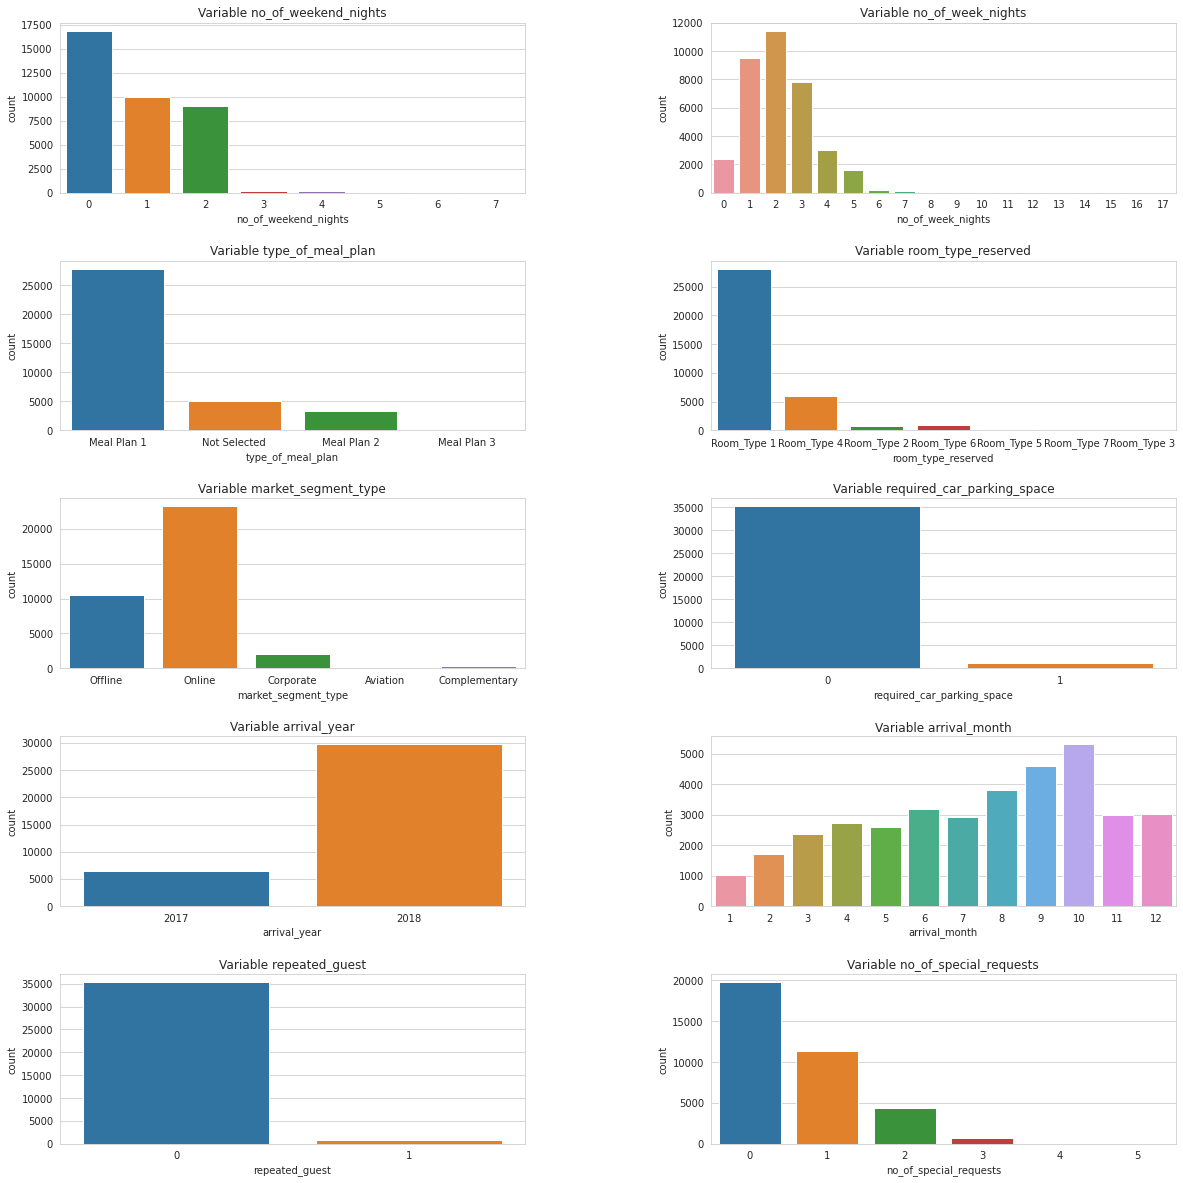

In [ ]:
# Create Visualization of Categorical Variable
plt.figure(figsize = (20,25))
for i, feature in enumerate(categorical_column):
  plt.subplot(6,2,i+1)
  plt.gca().set_title('Variable {}'.format(feature))
  sns.countplot(x = df[feature], data = df)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Based on categorical column visualization above, we get following information:
1. Most hotel bookings are made for short-term stays.
2. The most preferred type of meal plan is Meal Plan 1.
3. The most booked room type is 1.
4. Most bookings are made online
5. Generally, guests do not require a parking area.
6. The most bookings occurred in 2018.
7. The number of hotel bookings has an increasing trend from January to October, then decreases in November and December.
8. Most guest are new guests who have never booked a hotel.
9. In general, guests do not have special requests.

Next, we will visualize the numerical columns to find out the information contained in the data.

### Visualization of Numerical Variable

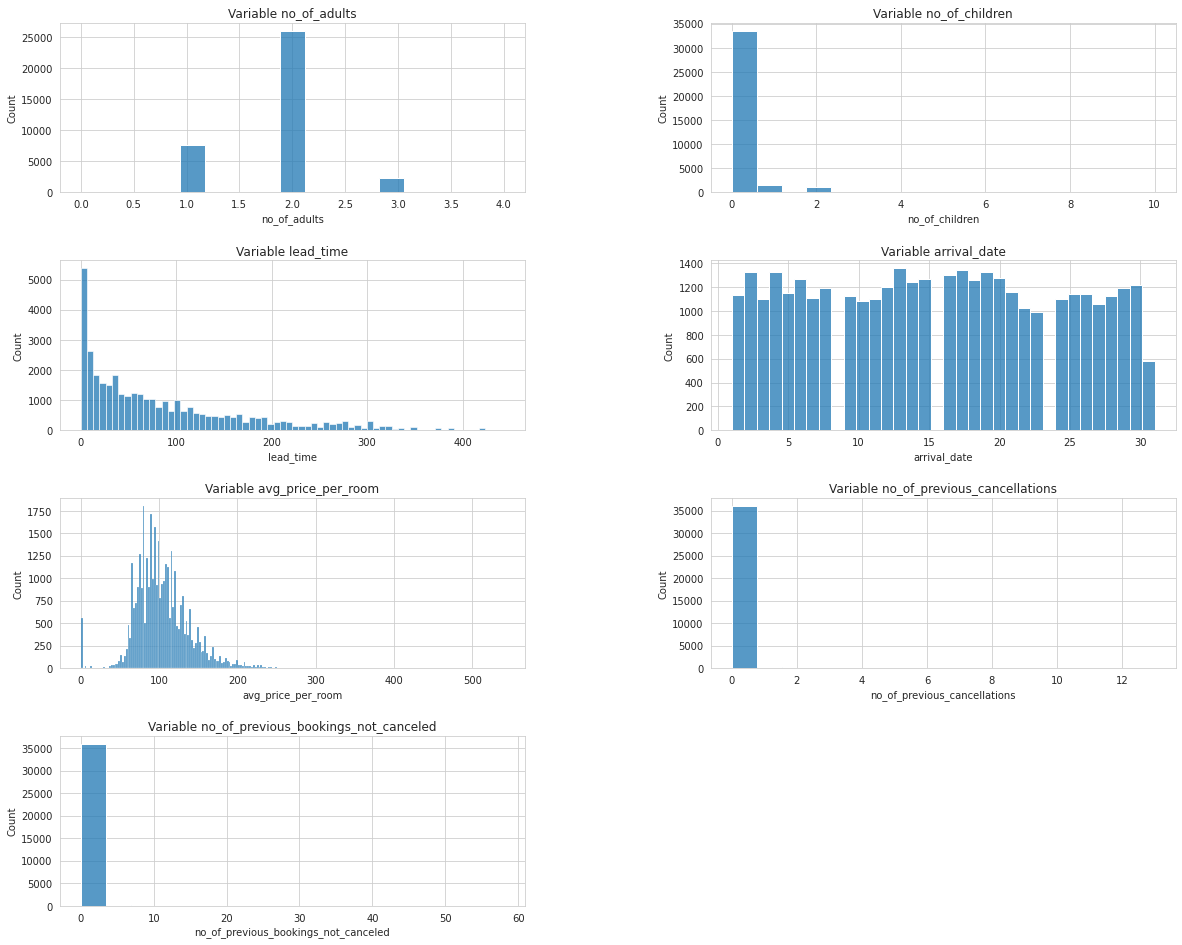

In [ ]:
# Create Visualization of Categorical Variable
plt.figure(figsize = (20,25))
for i, feature in enumerate(numerical_column):
  plt.subplot(6,2,i+1)
  plt.gca().set_title('Variable {}'.format(feature))
  sns.histplot(x=df[feature], kde=False)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Based on numerical column visualization above, we get following information:
1. Most hotel rooms are booked for two adults and no children
2. Most reservations are made without long lead times.
3. The average room price is 100 euros.
4. Most guests have never canceled a prior booking.

To find more information contained in the data. We will find out base on these question, so that we can get information as answers the questions we have made.

### Question 1: Are guests with long lead times more likely to cancel hotel bookings?

With a long lead time, things can happen that are beyond the control of the guest, such as getting sick, having financial problem that force the guest to cancel their stay, or the guest has found an alternative hotel.

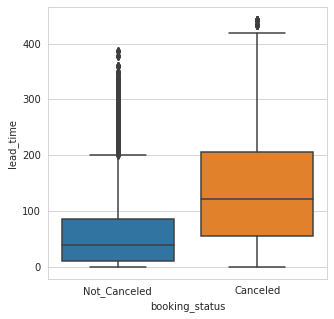

In [ ]:
# Create Boxplot lead_time by booking_status
plt.figure(figsize = (5,5))
sns.boxplot(df.booking_status, df.lead_time)
plt.show()

Based on the data visualization above, we can say that as waiting time increases, the probability of cancellation increases.

Note that there are many outliers among guests who did not cancel hotel bookings, meaning that even though some guests had long lead times, they did not cancel their hotel bookings.

### Question 2: Are guests with high room prices more likely to cancel hotel bookings?

It could be that with expensive hotel prices, guests tend to cancel hotel bookings because they want to save money or find hotels at lower prices.

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Density'>

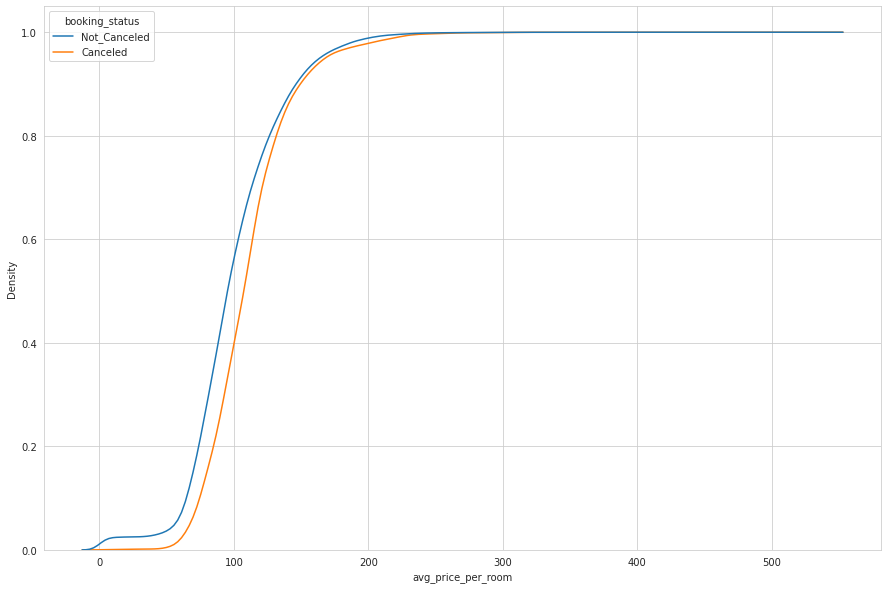

In [ ]:
plt.figure(figsize = (15,10))
sns.kdeplot(data = df, x = 'avg_price_per_room', hue = 'booking_status',cumulative=True, common_norm=False, common_grid=True)

50% of guests who did not cancel hotel bookings had an average room price of under 100 euros, while 50% of guests who canceled hotel bookings had an average room price of over 100 euros. We can conclude that there is a tendency for a higher chance of certain costs for guests who cancel hotel bookings compared to those who do not (this is because the number of guests who cancel hotel bookings is lower than that of those wo do not).

### Question 3: Are guests with online hotel bookings more likely to cancel their reservations?

With the development of information technology, we can easily make hotel reservations or cancel hotels online anywhere and anytime.

<AxesSubplot:xlabel='booking_status', ylabel='count'>

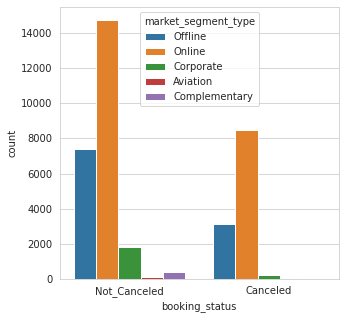

In [ ]:
# Create Countplot market_segment_type by booking_status
plt.figure(figsize = (5,5))
sns.countplot(x = 'booking_status', hue = 'market_segment_type', data = df)

We can see the most hotel cancellations in the online market segment. This happens because the majority of bookings are made online and it's easier to cancel online. Moreover, there are lots of applications mobile or web that can make it easier for guests to reservation and cancel hotel bookings.

###Question 4: Are guests with online hotel bookings and long lead times more likely to cancel their reservations?

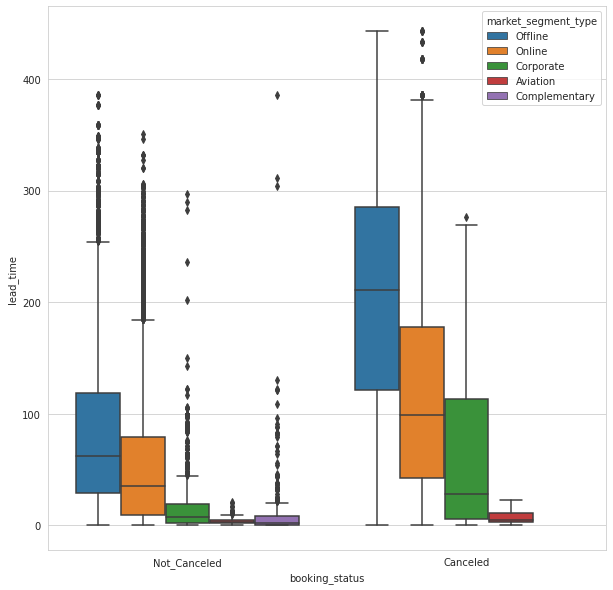

In [ ]:
# Create Countplot market_segment_type by booking_status
plt.figure(figsize = (10,10))
sns.boxplot(x='booking_status', y='lead_time', hue='market_segment_type', data=df)
plt.show()

The offline type market segment cancels with an average long lead time of around 200 days, and the online type market segment cancels with an average lead time of around 100 days.

We see a lot of outliers in the data; the type of outlier in this data is non-natural outliers. For example, guests may order rooms with an average price of 500 euros, which is far above the average of the avg_price_per_room feature of 100 euros.

The difference from Natural Outliers and Non-Natural Outliers Natural outliers arise due to measurement errors, incorrect data collection, or incorrect data entry. Whereas non-natural outliers can be found in examples of fraud transactions in banking data and hotel booking cancellations. [Source](https://pacmann.io/blog/cara-mendeteksi-dan-menangani-outlier-saat-melakukan-data-analysis)

##Feature Engineering

Feature engineering is the preprocessing step of machine learning, which extracts features from data. This helps to represent fundamental issues for machine learning in a better way, which, as a result, improves model accuracy for unseen data. The predictive model contains predictor variables and outcome variables, and the feature engineering process selects the most useful predictor variables for the model.

###Merge Feature

We will merge two features that have the same meaning into one feature, for example:
1. Merge the no_of_adults and no_of_children features into no_of_people.
2. Merge the no_of_weekend_nights and no_of_week_nights into no_of_week_days

We can merge two features above with PCA (Principal Component Analysis). PCA is the technique to use when you need to reduce the number of variables but don't know which ones to discard. which aims to reduce data so that data interpretation can be done quickly.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

# Merge 'no_of_adults' and 'no_of_children' into 'no_of_people'
pca_no_of_people = pca.fit_transform(df[['no_of_adults', 'no_of_children']])
df['no_of_people'] = pca_no_of_people
# Drop 'no_of_adults' and 'no_of_children'
df.drop(columns=['no_of_adults', 'no_of_children'], inplace=True)

# Merge 'no_of_weekend_nights' and 'no_of_week_nights' into 'no_of_week_days'
pca_no_week = pca.fit_transform(df[["no_of_weekend_nights","no_of_week_nights"]])
df["no_of_week_days"] = pca_no_week
# Drop 'no_of_weekend_nights' and 'no_of_week_nights'
df.drop(columns=["no_of_weekend_nights","no_of_week_nights"],inplace=True)

In [ ]:
df.head()

,Booking_ID,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_people,no_of_week_days
0,INN00001,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,0.158982,-0.168923
1,INN00002,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,0.158982,0.987358
2,INN00003,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,-0.840274,-0.983180
3,INN00004,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,0.158982,-0.339934
4,INN00005,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,0.158982,-1.154192


###Scaling

By scaling we ensure that we have the same scale for every column or variable we have. At this scaling, we will use the RobustScaler which uses medians and quatiles, the goal is to make it resistant to data outliers, bearing in mind that in data visualization we encounter many data outliers.

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[['lead_time',
    'avg_price_per_room',
    'no_of_people',
    'no_of_week_days',
    'no_of_special_requests']] = scaler.fit_transform(df[['lead_time',
                                                          'avg_price_per_room',
                                                          'no_of_people',
                                                          'no_of_week_days',
                                                          'no_of_special_requests']])

###Categorical Encoding

Computers cannot process category-type data, so we have to convert the data into numbers. This process is called encoding.

In [ ]:
df = pd.get_dummies(df,columns=['type_of_meal_plan','room_type_reserved','market_segment_type'])

We will do change value of Booking_Status, take "Not_Canceled" as 0 and "Canceled" as 1.

In [ ]:
df.booking_status = df.booking_status.replace({"Not_Canceled":0, "Canceled":1})

###Feature Selection

We will select features based on the degree of correlation to the target. 

In [ ]:
df.head()

,Booking_ID,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,0,1.532110,2017,10,2,0,0,0,-0.867758,...,0,0,0,0,0,0,0,0,1,0
1,INN00002,0,-0.477064,2018,11,6,0,0,0,0.182116,...,0,0,0,0,0,0,0,0,0,1
2,INN00003,0,-0.513761,2018,2,28,0,0,0,-0.993703,...,0,0,0,0,0,0,0,0,0,1
3,INN00004,0,1.412844,2018,5,20,0,0,0,0.013854,...,0,0,0,0,0,0,0,0,0,1
4,INN00005,0,-0.082569,2018,4,11,0,0,0,-0.124685,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

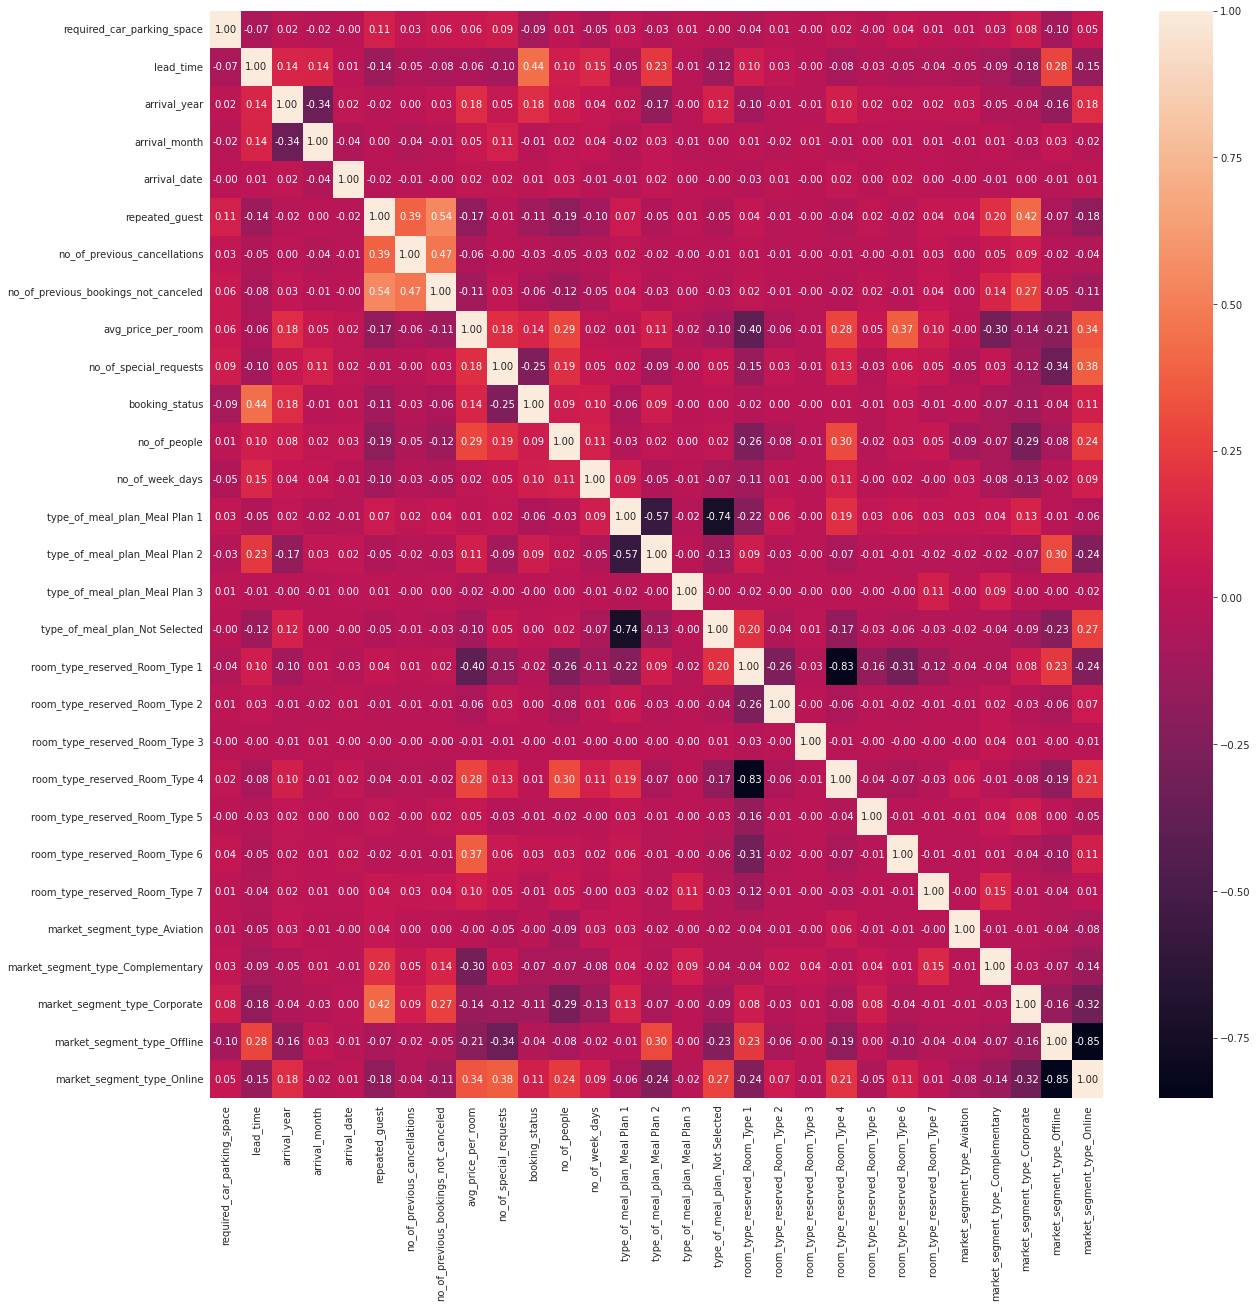

In [ ]:
# Create Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, fmt=".2f")

Based on the heatmap above, we can remove features that have low correlation with the target.

In [ ]:
df.drop(columns=['market_segment_type_Offline','market_segment_type_Aviation','room_type_reserved_Room_Type 1',
                 'room_type_reserved_Room_Type 2','room_type_reserved_Room_Type 3','room_type_reserved_Room_Type 4',
                 'room_type_reserved_Room_Type 5','room_type_reserved_Room_Type 6','room_type_reserved_Room_Type 7',
                 'type_of_meal_plan_Not Selected','type_of_meal_plan_Meal Plan 3','no_of_previous_cancellations',
                 'arrival_month','arrival_date','Booking_ID','arrival_year','no_of_previous_bookings_not_canceled',
                 'market_segment_type_Complementary'],inplace=True)

In [ ]:
df.head()

,required_car_parking_space,lead_time,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,no_of_people,no_of_week_days,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,market_segment_type_Corporate,market_segment_type_Online
0,0,1.532110,0,-0.867758,0.0,0,-8.378692e-13,5.166980e-15,1,0,0,0
1,0,-0.477064,0,0.182116,1.0,0,5.974497e-14,6.425469e-01,0,0,0,1
2,0,-0.513761,0,-0.993703,0.0,1,-2.591492e+01,-4.524844e-01,1,0,0,1
3,0,1.412844,0,0.013854,0.0,1,0.000000e+00,-9.503130e-02,1,0,0,1
4,0,-0.082569,0,-0.124685,0.0,1,0.000000e+00,-5.475156e-01,0,0,0,1


In [ ]:
df.shape

(36275, 12)

##Modeling Machine Learning

Here we will use the Machine Learning method, namely KNeighborsClassifiers, Logistic Regression, SVM, Random Forest, Adaboost and XGB Classifier to test which of the four produces the best performance in predicting class targets.

###Train-Test Split

We will divide the dataset into 30% Testing Data and 70% Training Data.

In [ ]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

# Print Shape
print('Shape Feature Columns: ',X.shape)
print('Shape Target Columns: ', y.shape)

Shape Feature Columns:  (36275, 11)
Shape Target Columns:  (36275,)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting X dan y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

# Print Shape
print('Shape X_train: ',X_train.shape)
print('Shape y_train: ', y_train.shape)
print('Shape X_test: ', X_test.shape)
print('Shape y_test: ', y_test.shape)

Shape X_train:  (25392, 11)
Shape y_train:  (25392,)
Shape X_test:  (10883, 11)
Shape y_test:  (10883,)


###Create Function Accuracy, Precision, F1 Score, and Recall

Previously, functions will be created to calculate accuracy, precision, f1_score and recall

In [ ]:
# This function is used to determine the accuracy value of the ML model predictions
def accuracy(conf_matrix):
  # Define variables
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Calculate accuracy score
  accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
  return accuracy

# This function is used to determine the precision value of the ML model predictions
def precision(conf_matrix):
   # Define variables 
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Calculate precision score
  precision = (true_positive)/(true_positive + false_positive)
  return precision

# This function is used to determine the recall value of the ML model predictions
def recall(conf_matrix):
  # Definisikan variabel 
  true_positive = conf_matrix[0][0]
  false_negative = conf_matrix[0][1]
  false_positive = conf_matrix[1][0]
  true_negative = conf_matrix[1][1]

  # Calculate recall score
  recall = (true_positive)/(true_positive + false_negative)
  return recall

# This function is used to determine the f1-score value of the ML model predictions
def f1(conf_matrix):
  # Calculate f1 score
  f1 = 2 * ((precision(conf_matrix)*recall(conf_matrix))/(precision(conf_matrix) + recall(conf_matrix)))
  return f1

###Algorithms

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# List of classifier
classifier = [KNeighborsClassifier(), SVC(), LogisticRegression(max_iter = 500), RandomForestClassifier(),AdaBoostClassifier(),XGBClassifier()]

# Create an array that will be filled by the scores of each classifier model
training_accuracy = []
testing_accuracy = []
accuracy_score = []
precision_score = []
recall_score = []
f1_score = []

for i in range(len(classifier)):
  model = classifier[i]
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  conf_matrix = confusion_matrix(y_test,y_pred)

  # Add each score to the array provided
  training_accuracy.append(model.score(X_train, y_train))
  testing_accuracy.append(model.score(X_test, y_test))

  accuracy_score.append(accuracy(conf_matrix))
  precision_score.append(precision(conf_matrix))
  recall_score.append(recall(conf_matrix))
  f1_score.append(f1(conf_matrix))

In [ ]:
data_class = {'Model':['K-Nearest Neighbors (KNN)', 'Support Vector Machine (SVM)', 'Logistic Regression', 'Random Forest','Adaptive Boosting (Adaboost)','Extreme Gradient Boosting (XGB)'], 'Training Accuracy':training_accuracy, 'Testing Accuracy':testing_accuracy, 
              'Accuracy Score':accuracy_score, 'Precision Score':precision_score, 'Recall Score':recall_score, 'F1 Score':f1_score}
data_class = pd.DataFrame(data_class)

In [ ]:
data_class

,Model,Training Accuracy,Testing Accuracy,Accuracy Score,Precision Score,Recall Score,F1 Score
0,K-Nearest Neighbors (KNN),0.893510,0.853165,0.853165,0.880296,0.906127,0.893025
1,Support Vector Machine (SVM),0.794739,0.798769,0.798769,0.805795,0.925554,0.861533
2,Logistic Regression,0.798559,0.799779,0.799779,0.826405,0.891183,0.857572
3,Random Forest,0.991927,0.888358,0.888358,0.904662,0.933297,0.918756
4,Adaptive Boosting (Adaboost),0.819668,0.818800,0.818800,0.849799,0.889281,0.869092
5,Extreme Gradient Boosting (XGB),0.904340,0.880272,0.880272,0.895121,0.932210,0.913289


###Balancing Data with Under-Sampling

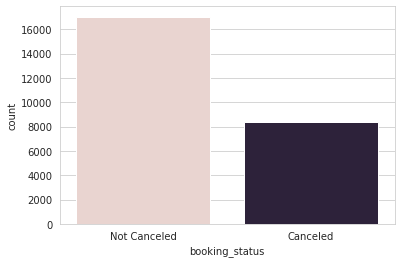

In [ ]:
# Create Countplot y_train before balancing data
sns.countplot(y_train,palette=sns.cubehelix_palette(2))
plt.xticks([0,1],["Not Canceled","Canceled"]);

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_undersampled,y_train_undersampled = rus.fit_resample(X_train,y_train)

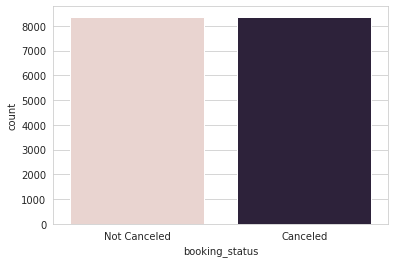

In [ ]:
sns.countplot(y_train_undersampled,palette=sns.cubehelix_palette(2))
plt.xticks([0,1],["Not Canceled","Canceled"]);

In [ ]:
# List of classifier
classifier = [KNeighborsClassifier(), SVC(), LogisticRegression(max_iter = 500), RandomForestClassifier(),AdaBoostClassifier(),XGBClassifier()]

# Create an array that will be filled by the scores of each classifier model
training_accuracy = []
testing_accuracy = []
accuracy_score = []
precision_score = []
recall_score = []
f1_score = []

for i in range(len(classifier)):
  model = classifier[i]
  model.fit(X_train_undersampled,y_train_undersampled)
  y_pred = model.predict(X_test)
  conf_matrix = confusion_matrix(y_test,y_pred)

  # Add each score to the array provided
  training_accuracy.append(model.score(X_train, y_train))
  testing_accuracy.append(model.score(X_test, y_test))

  accuracy_score.append(accuracy(conf_matrix))
  precision_score.append(precision(conf_matrix))
  recall_score.append(recall(conf_matrix))
  f1_score.append(f1(conf_matrix))

In [ ]:
data_class = {'Model':['K-Nearest Neighbors (KNN)', 'Support Vector Machine (SVM)', 'Logistic Regression', 'Random Forest','Adaptive Boosting (Adaboost)','Extreme Gradient Boosting (XGB)'], 'Training Accuracy':training_accuracy, 'Testing Accuracy':testing_accuracy, 
              'Accuracy Score':accuracy_score, 'Precision Score':precision_score, 'Recall Score':recall_score, 'F1 Score':f1_score}
data_class = pd.DataFrame(data_class)

In [ ]:
data_class

,Model,Training Accuracy,Testing Accuracy,Accuracy Score,Precision Score,Recall Score,F1 Score
0,K-Nearest Neighbors (KNN),0.859286,0.828540,0.828540,0.910626,0.827741,0.867208
1,Support Vector Machine (SVM),0.780325,0.784159,0.784159,0.878436,0.790246,0.832010
2,Logistic Regression,0.778789,0.782780,0.782780,0.876223,0.790518,0.831167
3,Random Forest,0.951048,0.870348,0.870348,0.929417,0.874745,0.901253
4,Adaptive Boosting (Adaboost),0.794305,0.789672,0.789672,0.887176,0.789431,0.835454
5,Extreme Gradient Boosting (XGB),0.889414,0.861160,0.861160,0.918934,0.871621,0.894652


###Balancing Data with SVM-SMOTE (Over-Sampling)

In [ ]:
from imblearn.over_sampling import SVMSMOTE

ros = SVMSMOTE(random_state=0)
X_train_oversampled,y_train_oversampled = ros.fit_resample(X_train,y_train)

In [ ]:
# List of classifier
classifier = [KNeighborsClassifier(), SVC(), LogisticRegression(max_iter = 500), RandomForestClassifier(),AdaBoostClassifier(),XGBClassifier()]

# Create an array that will be filled by the scores of each classifier model
training_accuracy = []
testing_accuracy = []
accuracy_score = []
precision_score = []
recall_score = []
f1_score = []

for i in range(len(classifier)):
  model = classifier[i]
  model.fit(X_train_oversampled,y_train_oversampled)
  y_pred = model.predict(X_test)
  conf_matrix = confusion_matrix(y_test,y_pred)

  # Add each score to the array provided
  training_accuracy.append(model.score(X_train, y_train))
  testing_accuracy.append(model.score(X_test, y_test))

  accuracy_score.append(accuracy(conf_matrix))
  precision_score.append(precision(conf_matrix))
  recall_score.append(recall(conf_matrix))
  f1_score.append(f1(conf_matrix))

In [ ]:
data_class = {'Model':['K-Nearest Neighbors (KNN)', 'Support Vector Machine (SVM)', 'Logistic Regression', 'Random Forest','Adaptive Boosting (Adaboost)','Extreme Gradient Boosting (XGB)'], 'Training Accuracy':training_accuracy, 'Testing Accuracy':testing_accuracy, 
              'Accuracy Score':accuracy_score, 'Precision Score':precision_score, 'Recall Score':recall_score, 'F1 Score':f1_score}
data_class = pd.DataFrame(data_class)

In [ ]:
data_class

,Model,Training Accuracy,Testing Accuracy,Accuracy Score,Precision Score,Recall Score,F1 Score
0,K-Nearest Neighbors (KNN),0.886224,0.820638,0.820638,0.912964,0.812254,0.859669
1,Support Vector Machine (SVM),0.764296,0.767895,0.767895,0.896897,0.742155,0.812221
2,Logistic Regression,0.763823,0.768906,0.768906,0.888550,0.752751,0.815033
3,Random Forest,0.991375,0.871910,0.871910,0.918385,0.889689,0.903809
4,Adaptive Boosting (Adaboost),0.784184,0.782689,0.782689,0.896256,0.767559,0.826930
5,Extreme Gradient Boosting (XGB),0.891462,0.866213,0.866213,0.912764,0.886972,0.899683


##Conclusion

- We have done an Exploratory Data Analysis (EDA), by doing this, we can find out more about the information contained in the data and support business decisions.
- We use an algorithm model including: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Logistic Regression, Random Forest, Adaptive Boosting (Adaboost), and Extreme Gradient Boosting (XGB).
- We get good accuracy results; among the six models we use, the Random Forest model gets the highest accuracy of 88.8%. But, the data we use is unbalanced data, so I’m curious to implement data balancing.
- First, we use Under-Sampling to balance the data. Among the six models, the Random Forest model has the highest accuracy of 87%, slightly smaller that when not using the data balancing method. But, I find it useful when we already have balanced data to work with.
- Then, we use SVM-SMOTE (Over-Sampling), and get the Random Forest model which still has the highest accuracy of 87%.
- When we use the data balancing method, we get the same accuracy value of 87% (although if we look closely, there is still a slight difference). But we will weigh in on the Precision Score to suggest which model is the best. If we take a look, the Random Forest Model with Under-Sampling has the highest Precision Score of 92%.
- Precision scores are used when we prefer true positives and really do not want false positives to occur. In this case, we want guests who will actually cancel, not guests who we predict not to cancel, because then the hotel staff will prepare for all the needs of guests at the hotel, even if the guest later cancels or not.